# Chapter 3

This notebook contains the exercises for lecture 3.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Problem 1

Let's consider our iris-dataset from the first day. Do the following:

1. Group the data based on species.
2. Calculate mean and variance for all other columns (`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`) based on this grouping.
3. Store these values into `iris_stats`-dataframe.
4. Try to get the data back into the following tidy format (`Species` (e.g. `setosa`), `Statistic` (e.g. `mean`), `Feature` (e.g. `Sepal.Length`) and `mean` and `var` for the columns. Using [unstack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)-function might make it easier.


| |Species| 	Feature| 	mean 	|var|
|-|-|-|-|-|
|0| 	setosa 	|Petal.Length 	|1.464 	|0.030106|
|1| 	setosa 	|Petal.Width 	|0.244 	|0.011494|
|2| 	setosa 	|Sepal.Length 	|5.006 	|0.124249|
|3| 	setosa 	|Sepal.Width 	|3.418 	|0.145180|
|4| 	versicolor 	|Petal.Length 	|4.260 	|0.220816|
|5| 	versicolor 	|Petal.Width 	|1.326 	|0.039106|
|6| 	versicolor 	|Sepal.Length 	|5.936 	|0.266433|
|7| 	versicolor 	|Sepal.Width 	|2.770 	|0.098469|
|8| 	virginica 	|Petal.Length 	|5.552 	|0.304588|
|9| 	virginica 	|Petal.Width 	|2.026 	|0.075433|
|10| 	virginica 	|Sepal.Length 	|6.588 	|0.404343|
|11| 	virginica 	|Sepal.Width 	|2.974 	|0.104004|

Bonus:

- Create a function that does these operations for **all** similar datasets (all columns are used for calculations). You can try it on the `wdbc` dataset given below (group by 'Diagnosis').

Relevant API pages:

- [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
- [pandas.DataFrame.agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
- [pandas.DataFrame.rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)
- [pandas.DataFrame.pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)

In [2]:
# Define function for iris data loading
def load_iris(iris_data_file):
    iris_data = pd.read_csv(
        iris_data_file,
        names=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'],
    )
    iris_data['Species'] = iris_data['Species'].map(lambda x: x.replace('Iris-','')).astype('category')
    return iris_data

iris_data = load_iris('../data/iris.data')

# Define function for wdbc data loading
def load_wdbc(wdbc_data_file):
    wdbc_data = pd.read_csv(
        wdbc_data_file,
        header=None,
        prefix='X'
    )
    #wdbc_data.drop('X0', inplace=True)
    wdbc_data['X1'] = wdbc_data['X1'].astype('category')
    wdbc_data = wdbc_data.rename(columns={'X1':'Diagnosis'})
    wdbc_data = wdbc_data.drop('X0', axis=1)
    return wdbc_data

wdbc = load_wdbc('../data/wdbc.data')

In [3]:
# Step 1
iris_grouped = iris_data.copy().groupby(['Species'])

# Step 2 and 3
iris_stats = iris_grouped.agg(['mean','var'])

# Step 4
iris_stats = iris_stats.unstack().reset_index().rename(columns={'level_0':'Feature', 'level_1': 'Statistic', 0:'Value'})

iris_stats = iris_stats.pivot(index=('Species','Feature'), columns='Statistic', values='Value').reset_index()

iris_stats.columns.name = None

iris_stats

,Species,Feature,mean,var
0,setosa,Petal.Length,1.464,0.030106
1,setosa,Petal.Width,0.244,0.011494
2,setosa,Sepal.Length,5.006,0.124249
3,setosa,Sepal.Width,3.418,0.145180
4,versicolor,Petal.Length,4.260,0.220816
5,versicolor,Petal.Width,1.326,0.039106
6,versicolor,Sepal.Length,5.936,0.266433
7,versicolor,Sepal.Width,2.770,0.098469
8,virginica,Petal.Length,5.552,0.304588
9,virginica,Petal.Width,2.026,0.075433


Bonus:

In [4]:
def get_statistics(dataset, group_variable):
    dataset_grouped = dataset.groupby(group_variable)
    dataset_stats = dataset_grouped.agg([np.mean, np.var], axis=1)
    dataset_stats = dataset_stats.unstack().reset_index().rename(columns={'level_0':'Feature', 'level_1': 'Statistic', 0:'Value'})
    return dataset_stats

get_statistics(wdbc, 'Diagnosis').head()

,Feature,Statistic,Diagnosis,Value
0,X2,mean,B,12.146524
1,X2,mean,M,17.462830
2,X2,var,B,3.170222
3,X2,var,M,10.265431
4,X3,mean,B,17.914762


## Problem 2

1. Calculate correlation between:

 - `Sepal.Length` and `Sepal.Width`
 - `Petal.Length` and `Petal.Width`

   Do you think that there is a linear relation between these variables?

2. Do a linear plot between:

 - `Sepal.Length` and `Sepal.Width`
 - `Petal.Length` and `Petal.Width`

   Print coefficients,

3. Plot both datasets as separate scatterplots and plot linear fits on top of them.

Relevant API pages:

- [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

In [5]:
# Step 1
print('Sepal covariance:\n', iris_data[['Sepal.Width', 'Sepal.Length']].corr())
print('Petal covariance:\n', iris_data[['Petal.Width', 'Petal.Length']].corr())

Sepal covariance:
               Sepal.Width  Sepal.Length
Sepal.Width      1.000000     -0.109369
Sepal.Length    -0.109369      1.000000
Petal covariance:
               Petal.Width  Petal.Length
Petal.Width      1.000000      0.962757
Petal.Length     0.962757      1.000000


<AxesSubplot:xlabel='Petal.Width', ylabel='Petal.Length'>

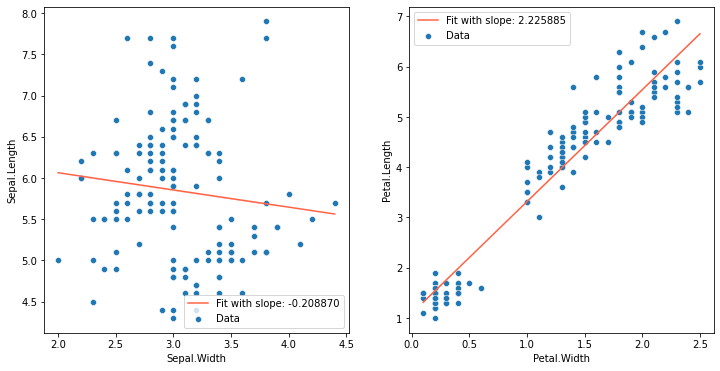

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.optimize import curve_fit

def linear_model(x, a, b):
    return a*x+b

def fit_linear(dataset, x_column, y_column, result_name='Coef'):

    coefs,_ = curve_fit(linear_model, dataset[x_column], dataset[y_column])

    return coefs

# Step 2
def get_predictions(dataset, coefs, x_column):
    
    prediction = linear_model(dataset[x_column], *coefs)
    return prediction

iris_fitted = iris_data.copy()

sepal_coefs = fit_linear(iris_fitted, 'Sepal.Width', 'Sepal.Length')
iris_fitted['Sepal.Prediction'] = get_predictions(iris_fitted, sepal_coefs, 'Sepal.Width')

petal_coefs = fit_linear(iris_fitted, 'Petal.Width', 'Petal.Length')
iris_fitted['Petal.Prediction'] = get_predictions(iris_fitted, petal_coefs, 'Petal.Width')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sb.scatterplot(x='Sepal.Width', y='Sepal.Length', data=iris_fitted, label='Data', ax=ax1)
sb.lineplot(x='Sepal.Width', y='Sepal.Prediction', data=iris_fitted, label='Fit with slope: %f' % sepal_coefs[0], color='tomato', ax=ax1)
sb.scatterplot(x='Petal.Width', y='Petal.Length', data=iris_fitted, label='Data', ax=ax2)
sb.lineplot(x='Petal.Width', y='Petal.Prediction', data=iris_fitted, label='Fit with slope: %f' % petal_coefs[0], color='tomato', ax=ax2)

## Problem 3

Use whatever means to calculate separate linear plots between

 - `Sepal.Length` and `Sepal.Width`
 - `Petal.Length` and `Petal.Width`
 
for all groups. Plot them in the same graph with different colors.

In [7]:
def get_iris_coefs(dataset, column_name):
    x_column = column_name + '.Width'
    y_column = column_name + '.Length'
    result_name = column_name + '.Coefs'
    return pd.Series({result_name : fit_linear(dataset, x_column, y_column)})

def get_iris_predictions(dataset, column_name):
    coefs_column = column_name + '.Coefs'
    x_column = column_name + '.Width'
    y_column = column_name + '.Length'
    result_name = column_name + '.Coefs'
    return pd.Series({result_name : get_predictions(dataset['Data'], dataset[coefs_column], x_column)})

iris_fitdata = iris_data.groupby('Species').apply(lambda x: pd.Series({'Data': x.copy()}))
iris_fitdata['Sepal.Coefs'] = iris_data.groupby('Species').apply(lambda x: get_iris_coefs(x, 'Sepal'))
iris_fitdata['Petal.Coefs'] = iris_data.groupby('Species').apply(lambda x: get_iris_coefs(x, 'Petal'))
iris_fitdata['Sepal.Prediction'] = iris_fitdata[['Data','Sepal.Coefs']].apply(lambda x: get_iris_predictions(x, 'Sepal'), axis=1)
iris_fitdata['Petal.Prediction'] = iris_fitdata[['Data','Petal.Coefs']].apply(lambda x: get_iris_predictions(x, 'Petal'), axis=1)
iris_fitdata

,Data,Sepal.Coefs,Petal.Coefs,Sepal.Prediction,Petal.Prediction
Species,,,,,
setosa,Sepal.Length Sepal.Width Petal.Length P...,"[0.6908543950453848, 2.644659677610479]","[0.4957386450667354, 1.3430397706037165]",0 5.062650 1 4.717223 2 4.855394 3...,0 1.442187 1 1.442187 2 1.442187 3...
versicolor,Sepal.Length Sepal.Width Petal.Length P...,"[0.8650777317108206, 3.5397346834070116]","[1.8693246949095186, 1.7812754527924604]",50 6.307983 51 6.307983 52 6.221476 5...,50 4.398330 51 4.585262 52 4.585262 5...
virginica,Sepal.Length Sepal.Width Petal.Length ...,"[0.9015344790107408, 3.906836459580355]","[0.6472593394860837, 4.240652579552302]",100 6.881900 101 6.340980 102 6.61144...,100 5.858801 101 5.470445 102 5.59989...


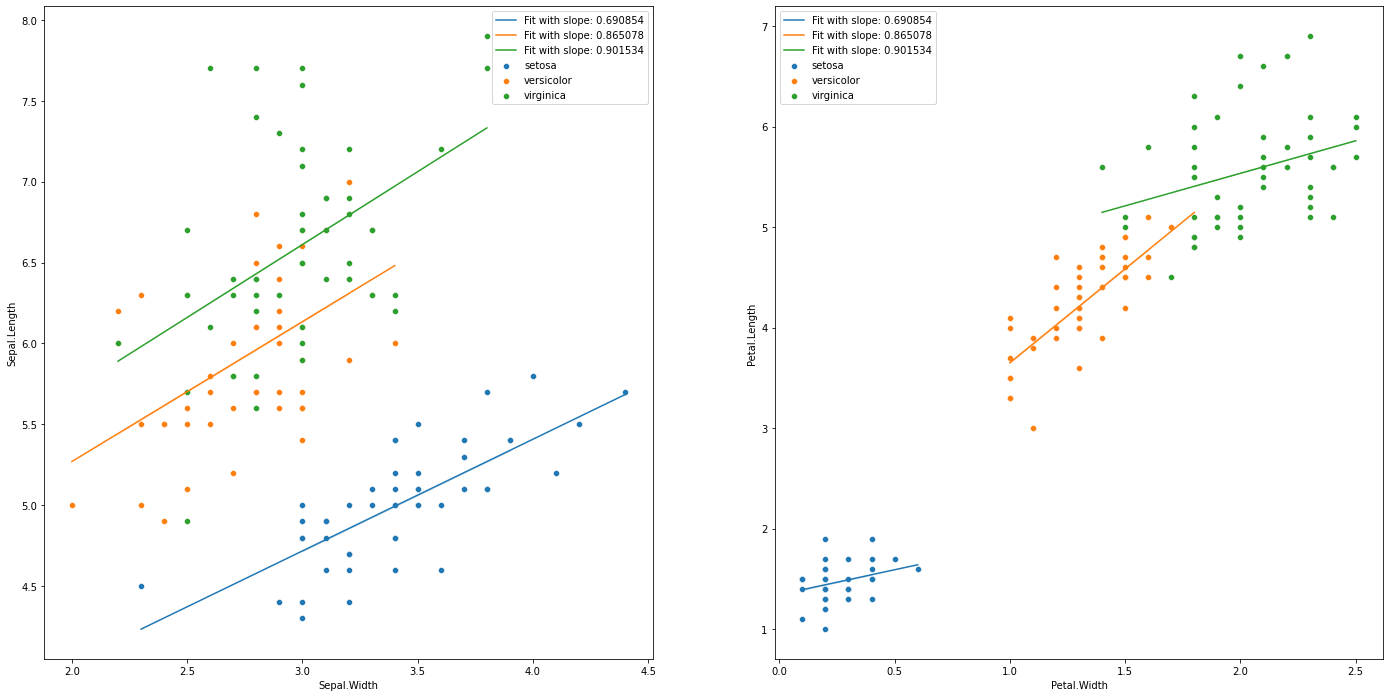

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24,12))

for species, species_data in iris_data.groupby('Species'):
    
    orig_data = iris_fitdata.loc[species, 'Data']

    sepal_coefs = iris_fitdata.loc[species, 'Sepal.Coefs']
    sepal_prediction = iris_fitdata.loc[species, 'Sepal.Prediction']

    petal_coefs = iris_fitdata.loc[species, 'Petal.Coefs']
    petal_prediction = iris_fitdata.loc[species, 'Petal.Prediction']
    
    sb.scatterplot(x='Sepal.Width', y='Sepal.Length', data=orig_data, label=species, ax=ax1)
    sb.lineplot(x='Sepal.Width', y=sepal_prediction, data=orig_data, label='Fit with slope: %f' % sepal_coefs[0], ax=ax1)
    sb.scatterplot(x='Petal.Width', y='Petal.Length', data=orig_data, label=species, ax=ax2)
    sb.lineplot(x='Petal.Width', y=petal_prediction, data=orig_data, label='Fit with slope: %f' % sepal_coefs[0], ax=ax2)